In [341]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix


pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 4)

In [342]:
# Klasy (w kolumnie Label): 0 - normal data (68424), 1 - attack data
df = pd.read_csv(r'.\Normal_data_with_ddos.csv') # 48413 DDoS data

In [343]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,124937,1071,9100,0,2839.4773,1839.5083,517,0,26.7750,109.1880,513835.9907,342.5356,2.9546e+03,7.9532e+03,64066,-44,238564,5.5480e+03,1.0446e+04,64066,2,245230,6287.9487,12986.4688,79070,29,0,0,0,0,880,804,179.4234,163.1122,0,9100,1482.4471,1933.2683,3.7375e+06,0,1,0,0,1,0,0,0,0,1500.0952,2839.4773,26.7750,0,0,0,0,0,0,44,124937,40,1071,-1,65535,41,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0,0
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,1071,439537,517,0,10.0093,67.4967,27300,0,2949.9128,3012.5895,274445.3421,159.4569,6.2959e+03,5.6408e+04,859760,-102,1332121,1.2567e+04,8.3434e+04,861138,2,1603130,10831.9595,73926.6524,861129,1,0,0,0,0,2140,3004,66.6480,92.8089,0,27300,1714.4280,2713.4659,7.3629e+06,0,1,0,0,0,0,0,0,1,1721.1250,10.0093,2949.9128,0,0,0,0,0,0,107,1071,149,439537,-1,64240,4,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0,0
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,66,758,66,0,13.2000,29.5161,638,0,151.6000,276.8263,15524.3227,188.4020,5.8976e+03,1.5185e+04,46232,19,50302,1.2576e+04,2.2522e+04,46251,67,52962,13240.5000,22052.0441,46258,405,0,0,0,0,100,124,94.2010,94.2010,0,638,74.9091,190.8075,3.6407e+04,0,1,0,0,0,0,0,0,1,82.4000,13.2000,151.6000,0,0,0,0,0,0,5,66,5,758,-1,64240,1,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0,0
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,0,0,0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,286.7384,6.9750e+03,0.0000e+00,6975,6975,0,0.0000e+00,0.0000e+00,0,0,0,0.0000,0.0000,0,0,0,0,0,0,20,20,143.3692,143.3692,0,0,0.0000,0.0000,0.0000e+00,0,0,0,0,1,0,0,0,1,0.0000,0.0000,0.0000,0,0,0,0,0,0,1,0,1,0,-1,64239,0,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0,0
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,780,11085,427,0,60.0000,130.0429,2596,0,692.8125,794.1573,62401.0603,152.5184,6.7908e+03,1.2933e+04,38521,-54,86882,7.2402e+03,1.3051e+04,38805,1,190141,12676.0667,15949.0928,38521,1,0,0,0,0,260,344,68.3703,84.1481,0,2596,395.5000,661.6917,4.3784e+05,0,1,0,0,0,0,0,0,1,409.1379,60.0000,692.8125,0,0,0,0,0,0,13,780,16,11085,-1,64240,3,0,0.0000e+00,0.0000e+00,0,0,0.0,0.0000e+00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116832,192.168.20.134-199.128.37.150-0-0-0,199.128.37.150,0,192.168.20.134,0,0,4/2/2020 15:20,2,0,2,0,0,0,0,0.0000,0.0000

In [344]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,116837.0000,116837.0000,116837.0000,1.1684e+05,116837.0000,116837.0000,1.1684e+05,1.1684e+05,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,116837.0,116837.0000,116837.0,116837.0,116837.0000,116837.0000,116837.0000,1.1684e+05,116837.0000,116837.0000,116837.0000,116837.0000,1.1684e+05,116837.0000,116837.0000,116837.0000,116837.0000,116837.0000,116837.0,116837.0,116837.0,116837.0000,116837.0000,116837.0000,116837.0000,116837.0,116837.0,116837.0,116837.0,116837.0,116837.0,116837.0000,1.1684e+05,116837.0000,1.1684e+05,116837.0,116837.0000,116837.0000,116837.0,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,1.1684e+05,116837.0000
mean,21879.9805,5700.4316,6.6874,7.9813e+06,14.7100,11.7173,1.9645e+03,2.4176e+04,249.4013,13.0582,89.5535,94.6916,936.0695,15.2244,193.1011,224.0320,1.9508e+05,6.3526e+05,3.1627e+05,8.2208e+05,3.1797e+06,2.1968e+04,7.6600e+06,6.7630e+05,1.1064e+06,3.0362e+06,5.4238e+04,7.4103e+06,5.0774e+05,9.7776e+05,2.9878e+06,2.0459e+04,0.0,0.0651,0.0,0.0,133.6369,211.6137,3006.3801,6.3225e+05,12.4065,1071.1880,148.6180,241.3291,6.6397e+05,0.0208,0.1155,0.0004,0.0651,0.1763,0.0,0.0,0.0,0.9565,165.8051,89.5535,193.1011,0.0,0.0,0.0,0.0,0.0,0.0,14.7100,1.9646e+03,11.7173,2.4182e+04,-1.0,16540.6892,2.2789,0.0,1.1060e+05,8.4034e+04,2.3323e+05,5.0161e+04,2.6406e+06,3.5382e+05,2.9675e+06,2.3280e+06,0.4144
std,24087.3536,15566.5742,7.0494,2.6577e+07,2665.8347,180.7494,1.1947e+05,5.8808e+05,1110.8013,52.6070,448.3130,555.5502,4830.3437,34.2332,575.7508,817.4183,1.1239e+06,8.3569e+05,1.4636e+06,3.2238e+06,1.1415e+07,7.3446e+05,2.6316e+07,3.1671e+06,4.6894e+06,1.1294e+07,1.1689e+06,2.5758e+07,2.2712e+06,4.0537e+06,1.1173e+07,7.2024e+05,0.0,0.2467,0.0,0.0,1953.4799,3727.6632,47274.7719,8.3393e+05,22.9663,4917.8551,391.6154,778.2805,9.4256e+06,0.1426,0.3196,0.0194,0.2467,0.3810,0.0,0.0,0.0,1.2297,414.5476,448.3130,575.7508,0.0,0.0,0.0,0.0,0.0,0.0,2665.8347,1.1944e+05,180.7494,5.8886e+05,0.0,27976.4085,43.7252,0.0,1.0549e+06,8.4923e+05,1.8990e+06,7.8740e+05,1.0303e+07,2.6844e+06,1.1360e+07,9.7366e+06,0.4926
min,0.0000,0.0000,0.0000,-1.5400e+02,0.0000,1.0000,0.0000e+00,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-2.6271e+05,-1.6949e+04,-1.5400e+02,0.0000e+00,-1.5400e+02,-1.1570e+04,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,-3.0000e+01,-1.5400e+02,-1.5400e+02,0.0000e+00,-1.5400e+02,-1.5400e+02,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000e+00,1.0000,0.0000e+00,-1.0,-1.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+0

In [345]:
# liczba rekordów w każdej klasie
print(pd.value_counts(df['Label'], sort = False))# ilość rekordów w klasie 0 (normalny przepływ) jest większa niż w klasie 1 (atak DDoS), co może wpłynąć na wyniki klasyfikacji

0    68424
1    48413
Name: Label, dtype: int64


In [346]:
Xn = df.iloc[0:1000].copy()
Xa = df.iloc[69000:70000].copy()
df = pd.concat([Xn,Xa], ignore_index=True)
print(pd.value_counts(df['Label'], sort = False))

X1 = df.drop(["Label","Src IP","Src Port","Dst IP","Dst Port","Protocol","Flow ID","Timestamp"], axis=1).to_numpy()
y1 = df["Label"].to_numpy()


0    1000
1    1000
Name: Label, dtype: int64


In [347]:
df1_cut = df.drop(["Label","Src IP","Src Port","Dst IP","Dst Port","Protocol","Flow ID","Timestamp"], axis=1) #usuwanie kolumn, które nie będą brane pod uwagę w klasyfikacji
#y1 = df1["Label"]
df1_cut

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,245230,44,40,124937,1071,9100,0,2839.4773,1839.5083,517,0,26.7750,109.1880,513835.9907,3.4254e+02,2954.5783,7953.2219,64066,-44,238564,5548.0000,10446.2958,64066,2,245230,6287.9487,12986.4688,79070,29,0,0,0,0,880,804,179.4234,1.6311e+02,0,9100,1482.4471,1933.2683,3.7375e+06,0,1,0,0,1,0,0,0,0,1500.0952,2839.4773,26.7750,0,0,0,0,0,0,44,124937,40,1071,-1,65535,41,0,0.0,0.0,0,0,0.0,0.0,0,0
1,1605449,107,149,1071,439537,517,0,10.0093,67.4967,27300,0,2949.9128,3012.5895,274445.3421,1.5946e+02,6295.8784,56408.3305,859760,-102,1332121,12567.1792,83434.1416,861138,2,1603130,10831.9595,73926.6524,861129,1,0,0,0,0,2140,3004,66.6480,9.2809e+01,0,27300,1714.4280,2713.4659,7.3629e+06,0,1,0,0,0,0,0,0,1,1721.1250,10.0093,2949.9128,0,0,0,0,0,0,107,1071,149,439537,-1,64240,4,0,0.0,0.0,0,0,0.0,0.0,0,0
2,53078,5,5,66,758,66,0,13.2000,29.5161,638,0,151.6000,276.8263,15524.3227,1.8840e+02,5897.5556,15184.8452,46232,19,50302,12575.5000,22521.8773,46251,67,52962,13240.5000,22052.0441,46258,405,0,0,0,0,100,124,94.2010,9.4201e+01,0,638,74.9091,190.8075,3.6407e+04,0,1,0,0,0,0,0,0,1,82.4000,13.2000,151.6000,0,0,0,0,0,0,5,66,5,758,-1,64240,1,0,0.0,0.0,0,0,0.0,0.0,0,0
3,6975,1,1,0,0,0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,2.8674e+02,6975.0000,0.0000,6975,6975,0,0.0000,0.0000,0,0,0,0.0000,0.0000,0,0,0,0,0,0,20,20,143.3692,1.4337e+02,0,0,0.0000,0.0000,0.0000e+00,0,0,0,0,1,0,0,0,1,0.0000,0.0000,0.0000,0,0,0,0,0,0,1,0,1,0,-1,64239,0,0,0.0,0.0,0,0,0.0,0.0,0,0
4,190141,13,16,780,11085,427,0,60.0000,130.0429,2596,0,692.8125,794.1573,62401.0603,1.5252e+02,6790.7500,12933.2959,38521,-54,86882,7240.1667,13050.8416,38805,1,190141,12676.0667,15949.0928,38521,1,0,0,0,0,260,344,68.3703,8.4148e+01,0,2596,395.5000,661.6917,4.3784e+05,0,1,0,0,0,0,0,0,1,409.1379,60.0000,692.8125,0,0,0,0,0,0,13,780,16,11085,-1,64240,3,0,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,2,0,0,0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,2.0000e+06,1.0000,0.0000,1,1,0,0.0000,0.0000,0,0,1,1.0000,0.0000,1,1,0,0,0,0,0,0,0.0000,2.0000e+06,0,0,0.0000,0.0000,0.0000e+00,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,0,2,0,-1,-1,0,0,0.0,0.0,0,0,0.0,0.0,0,0
1996,1,0,2,0,0,0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,2.0000e+06,1.0000,0.0000,1,1,0,0.0000,0.0000,0,0,1,1.0000,0.0000,1,1,0,0,0,0,0,0,0.0000,2.0000e+06,0,0,0.0000,0.0000,0.0000e+00,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,0,2,0,-1,-1,0,0,0.0,0.0,0,0,0.0,0.0,0,0
1997,4,0,2,0,0,0,0,0.0000,0.0000,0,0,0.0000,0.0000,0.0000,5.0000e+05,4.0000,0.0000,4,4,0,0.0000,0.0000,0,0,4,4.0000,0.0000,4,4,0,0,0,0,0,0,0.0000,5.0000e+05,0,0,0.0000,0.0000,0.0000e+00,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,0,2,0,-1,-

In [348]:
df1_cut.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.0000e+03,2000.0000,2000.0000,2.0000e+03,2.0000e+03,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2000.0,2000.0000,2000.0,2000.0,2000.0000,2000.0000,2000.0000,2.0000e+03,2000.0000,2000.0000,2000.0000,2000.0000,2.0000e+03,2000.0000,2000.0000,2000.0,2000.0000,2000.0000,2000.0,2000.0,2000.0,2000.0000,2000.0000,2000.0000,2000.0000,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0000,2.0000e+03,2000.0000,2.0000e+03,2000.0,2000.0000,2000.0000,2000.0,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03,2.0000e+03
mean,1.1547e+07,11.1120,14.6265,4.3678e+03,2.8445e+04,239.6135,0.2065,56.5327,84.6772,1264.9060,1.0045,238.8921,319.3848,1.8964e+04,7.6073e+05,4.1702e+05,1.1343e+06,4.6247e+06,7.8028e+03,1.0866e+07,8.6588e+05,1.4916e+06,4.3649e+06,2.8806e+04,1.1001e+07,6.9964e+05,1.3388e+06,4.3434e+06,2.8764e+03,0.0,0.0870,0.0,0.0,221.5280,278.8620,747.1892,7.5999e+05,0.1220,1322.8035,151.3444,277.8252,6.1268e+05,0.0015,0.2720,0.0,0.0870,0.2260,0.0,0.0,0.0,0.3555,156.3383,56.5327,238.8921,0.0,0.0,0.0,0.0,0.0,0.0,11.1120,4.3678e+03,14.6265,2.8447e+04,-1.0,30524.6825,5.1565,0.0,2.4721e+05,1.3491e+05,4.5086e+05,1.4842e+05,3.5839e+06,6.3879e+05,4.1737e+06,3.0230e+06
std,2.9612e+07,109.4638,207.7687,1.1289e+05,7.2733e+05,570.6807,2.8217,141.7384,170.0206,4931.9827,6.6555,639.3117,908.1479,9.3008e+04,8.6203e+05,1.2481e+06,3.2072e+06,1.2288e+07,1.4191e+05,2.9226e+07,2.8736e+06,4.5862e+06,1.2211e+07,3.6035e+05,2.9263e+07,2.2631e+06,4.0666e+06,1.2106e+07,4.3381e+04,0.0,0.2819,0.0,0.0,2189.2231,4157.5325,22427.8936,8.6182e+05,2.0817,4935.6721,360.7072,732.0102,4.4136e+06,0.0387,0.4451,0.0,0.2819,0.4183,0.0,0.0,0.0,0.5208,367.9163,141.7384,639.3117,0.0,0.0,0.0,0.0,0.0,0.0,109.4638,1.1289e+05,207.7687,7.2744e+05,0.0,31831.2907,85.6409,0.0,1.3887e+06,7.4586e+05,2.1302e+06,1.2256e+06,1.0402e+07,3.2680e+06,1.2250e+07,9.2555e+06
min,1.0000e+00,0.0000,1.0000,0.0000e+00,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,9.8120e-02,1.0000e+00,0.0000e+00,1.0000e+00,-2.1810e+03,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,8.4890e-03,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000e+00,1.0000,0.0000e+00,-1.0,-1.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
25%,1.0000e+00,0.0000,2.0000,0.0000e+00,0.0000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,8.4716e+00,1.0000e+00,0.0000e+00,1.0000e+00,1.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00,1.0000e+00,1.0000e+00,0.0000e+0

In [349]:
x_mean = np.transpose(pd.DataFrame(df1_cut.mean())) #średnia wartość dla każdej kolumny
x_mean

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1.1547e+07,11.112,14.6265,4367.7805,28444.816,239.6135,0.2065,56.5327,84.6772,1264.906,1.0045,238.8921,319.3848,18964.0056,760734.1806,417016.56,1.1343e+06,4.6247e+06,7802.765,1.0866e+07,865883.2699,1.4916e+06,4.3649e+06,28806.1855,1.1001e+07,699640.1478,1.3388e+06,4.3434e+06,2876.444,0.0,0.087,0.0,0.0,221.528,278.862,747.1892,759986.9913,0.122,1322.8035,151.3444,277.8252,612678.7332,0.0015,0.272,0.0,0.087,0.226,0.0,0.0,0.0,0.3555,156.3383,56.5327,238.8921,0.0,0.0,0.0,0.0,0.0,0.0,11.112,4367.7805,14.6265,28447.4085,-1.0,30524.6825,5.1565,0.0,247206.1409,134905.7833,450857.587,148423.11,3.5839e+06,638786.2335,4.1737e+06,3.0230e+06


In [350]:
x_max = np.transpose(pd.DataFrame(df1_cut.max())) #maksymalna wartość dla każdej kolumny

In [351]:
x_min = np.transpose(pd.DataFrame(df1_cut.min())) #minimalna wartość dla każdej kolumny
x_min

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0981,1.0,0.0,1.0,-2181.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [352]:
x_std = np.transpose(pd.DataFrame(df1_cut.std())) #odchylenie standardowe dla każdej kolumny
x_std

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,2.9612e+07,109.4638,207.7687,112889.0334,727328.464,570.6807,2.8217,141.7384,170.0206,4931.9827,6.6555,639.3117,908.1479,93007.7334,862032.9061,1.2481e+06,3.2072e+06,1.2288e+07,141907.7822,2.9226e+07,2.8736e+06,4.5862e+06,1.2211e+07,360353.2327,2.9263e+07,2.2631e+06,4.0666e+06,1.2106e+07,43381.0016,0.0,0.2819,0.0,0.0,2189.2231,4157.5325,22427.8936,861816.2734,2.0817,4935.6721,360.7072,732.0102,4.4136e+06,0.0387,0.4451,0.0,0.2819,0.4183,0.0,0.0,0.0,0.5208,367.9163,141.7384,639.3117,0.0,0.0,0.0,0.0,0.0,0.0,109.4638,112889.0334,207.7687,727439.9852,0.0,31831.2907,85.6409,0.0,1.3887e+06,745863.0953,2.1302e+06,1.2256e+06,1.0402e+07,3.2680e+06,1.2250e+07,9.2555e+06


In [353]:
x_var = np.transpose(pd.DataFrame(df1_cut.var())) #wariancja dla każdej kolumny
x_var

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,8.7690e+14,11982.3256,43167.8299,1.2744e+10,5.2901e+11,325676.4103,7.9618,20089.7689,28907.0094,2.4324e+07,44.2956,408719.4816,824732.6109,8.6504e+09,7.4310e+11,1.5578e+12,1.0286e+13,1.5101e+14,2.0138e+10,8.5418e+14,8.2577e+12,2.1033e+13,1.4911e+14,1.2985e+11,8.5634e+14,5.1217e+12,1.6537e+13,1.4656e+14,1.8819e+09,0.0,0.0795,0.0,0.0,4.7927e+06,1.7285e+07,5.0301e+08,7.4273e+11,4.3333,2.4361e+07,130109.6586,535838.9241,1.9480e+13,0.0015,0.1981,0.0,0.0795,0.175,0.0,0.0,0.0,0.2713,135362.3889,20089.7689,408719.4816,0.0,0.0,0.0,0.0,0.0,0.0,11982.3256,1.2744e+10,43167.8299,5.2917e+11,0.0,1.0132e+09,7334.3682,0.0,1.9286e+12,5.5631e+11,4.5380e+12,1.5022e+12,1.0820e+14,1.0680e+13,1.5007e+14,8.5664e+13


In [354]:
x_median = np.transpose(pd.DataFrame(df1_cut.median())) #mediana dla każdej kolumny
x_median

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,27.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74482.7586,27.0,0.0,27.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57241.3793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


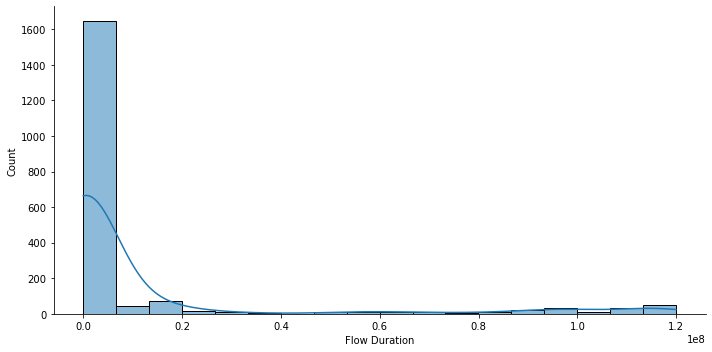

In [355]:
sn.displot(df1_cut['Flow Duration'],bins=18, kde=True,aspect=2) #histogram dla kolumny Flow Duration


In [356]:
# hist_per_col = 4

# # Obliczenie liczby wierszy i kolumn w układzie subplot
# rows = len(df1_cut.columns) // hist_per_col
# cols = hist_per_col

# # Tworzenie układu subplot
# fig, axes = plt.subplots(rows, cols, figsize=(20, 60))

# # Ustalenie odstępów między podwykresami
# plt.subplots_adjust(hspace=0.3, wspace=0.2) # Zwiększenie odstępów pionowych

# # Równomierne rozmieszczenie histogramów w układzie subplot
# axes = axes.flatten()

# # Pętla po kolumnach tabeli
# for i, col in enumerate(df1_cut.columns):
# # Wygenerowanie histogramu na odpowiednim podwykresie
#     if i < len(axes):
#         axes[i].hist(df1_cut[col], bins=50)
#         axes[i].set_yscale('log')
#         axes[i].set_title(f"Histogram {col}")

# # Ukrycie nieużywanych podwykresów
# for j in range(i+1, len(axes)):
#     axes[j].axis('off')

# # Wyświetlenie wykresów
# plt.show()




In [357]:

input_size = 76 #przypisanie wartości 2 do zmiennej input_size, ponieważ mamy 2 kolumny na wejściu  
output_size = 1 #przypisanie wartości 1 do zmiennej output_size, chcemy jedną kolumnę na wyjściu
model = tf.keras.Sequential([ #Stworzenie modelu za pomocą Sequential, przy użyciu liniowego stosowania warstw
    tf.keras.layers.Dense(output_size) #Łączenie warstw, przy użyciu Dense, z jedną warstwą wyjściową   
])
model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)) #Kompilacja modelu, przy użyciu optymalizatora sgd i funkcji straty binary_crossentropy
model.fit(X1, y1, epochs=100, verbose=1) #Trenowanie modelu, przy użyciu danych z pliku TF_dataset.npz, 100 epok, wyświetlanie postępu, verbose=1 oznacza, że wyświetla się postęp w postaci liczby epok

Epoch 1/100
63/63 [==============================] - 0s 598us/step - loss: 10675663.0000
Epoch 2/100
63/63 [==============================] - 0s 476us/step - loss: 9558896.0000
Epoch 3/100
63/63 [==============================] - 0s 688us/step - loss: 8620751.0000
Epoch 4/100
63/63 [==============================] - 0s 790us/step - loss: 7682605.5000
Epoch 5/100
63/63 [==============================] - 0s 694us/step - loss: 6744461.0000
Epoch 6/100
63/63 [==============================] - 0s 622us/step - loss: 5806316.5000
Epoch 7/100
63/63 [==============================] - 0s 607us/step - loss: 4868171.5000
Epoch 8/100
63/63 [==============================] - 0s 562us/step - loss: 3930026.7500
Epoch 9/100
63/63 [==============================] - 0s 556us/step - loss: 2991881.7500
Epoch 10/100
63/63 [==============================] - 0s 597us/step - loss: 2062086.6250
Epoch 11/100
63/63 [==============================] - 0s 582us/step - loss: 1132324.8750
Epoch 12/100
63/63 [=========

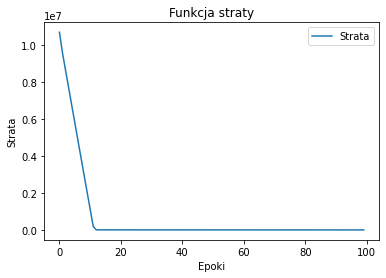

In [358]:
plt.plot(model.history.history['loss'], label='Strata') #Wykres funkcji straty # type: ignore
plt.title('Funkcja straty')
plt.ylabel('Strata')
plt.xlabel('Epoki')
plt.legend(loc="upper right")
plt.show()

In [359]:
Xn_train = Xn.iloc[0:800].copy()
Xn_test = Xn.iloc[800:1000].copy()
Xa_train = Xa.iloc[0:800].copy()
Xa_test = Xa.iloc[800:1000].copy()

Xtrain = pd.concat([Xn_train,Xa_train], ignore_index=True) # type: ignore
Xtest = pd.concat([Xn_test,Xa_test], ignore_index=True) # type: ignore

Ytrain = Xtrain["Label"].to_numpy()
Xtrain = Xtrain.drop(["Label","Src IP","Src Port","Dst IP","Dst Port","Protocol","Flow ID","Timestamp"], axis=1).to_numpy()

Ytest = Xtest["Label"].to_numpy()
Xtest = Xtest.drop(["Label","Src IP","Src Port","Dst IP","Dst Port","Protocol","Flow ID","Timestamp"], axis=1).to_numpy()


In [360]:
print(pd.value_counts(df['Label'], sort = False))
Ytest.shape

0    1000
1    1000
Name: Label, dtype: int64


(400,)

In [361]:
print(pd.value_counts(df['Label'], sort = False))
Xtrain.shape

0    1000
1    1000
Name: Label, dtype: int64


(1600, 76)

In [362]:
input_size = 76 #przypisanie wartości 2 do zmiennej input_size, ponieważ mamy 2 kolumny na wejściu  
output_size = 1 #przypisanie wartości 1 do zmiennej output_size, chcemy jedną kolumnę na wyjściu
# model = tf.keras.Sequential([ #Stworzenie modelu za pomocą Sequential, przy użyciu liniowego stosowania warstw
#     tf.keras.layers.Dense(output_size) #Łączenie warstw, przy użyciu Dense, z jedną warstwą wyjściową   
# ])
#intializer = tf.keras.initializers.TruncatedNormal(seed=42) #inicjalizacja wag
model = tf.keras.Sequential()   
model.add(tf.keras.layers.Dense(input_size, activation='sigmoid')) #Dodanie warstwy wejściowej, z 2 neuronami, z inicjalizacją wag
model.add(tf.keras.layers.Dense(output_size, activation='sigmoid')) #Dodanie warstwy wyjściowej, z 1 neuronem, z funkcją aktywacji sigmoid, z inicjalizacją wag
model.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)) #Kompilacja modelu, przy użyciu optymalizatora sgd i funkcji straty binary_crossentropy
result = model.fit(Xtrain, Ytrain, epochs=100, verbose=1) #Trenowanie modelu, przy użyciu danych z pliku TF_dataset.npz, 100 epok, wyświetlanie postępu, verbose=1 oznacza, że wyświetla się postęp w postaci liczby epok

Epoch 1/100


c:\Users\student\anaconda3\lib\site-packages\keras\backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 0s 674us/step - loss: 0.5595
Epoch 2/100
50/50 [==============================] - 0s 603us/step - loss: 0.2641
Epoch 3/100
50/50 [==============================] - 0s 594us/step - loss: 0.1683
Epoch 4/100
50/50 [==============================] - 0s 604us/step - loss: 0.1219
Epoch 5/100
50/50 [==============================] - 0s 593us/step - loss: 0.0951
Epoch 6/100
50/50 [==============================] - 0s 614us/step - loss: 0.0779
Epoch 7/100
50/50 [==============================] - 0s 584us/step - loss: 0.0659
Epoch 8/100
50/50 [==============================] - 0s 632us/step - loss: 0.0571
Epoch 9/100
50/50 [==============================] - 0s 593us/step - loss: 0.0505
Epoch 10/100
50/50 [==============================] - 0s 600us/step - loss: 0.0452
Epoch 11/100
50/50 [==============================] - 0s 572us/step - loss: 0.0410
Epoch 12/100
50/50 [==============================] - 0s 593us/step - loss: 0.0375
Epoch 13/100
50/50 [=====

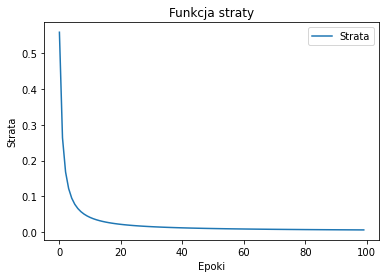

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (32, 76)                  5852      
                                                                 
 dense_113 (Dense)           (32, 1)                   77        
                                                                 
Total params: 5,929
Trainable params: 5,929
Non-trainable params: 0
_________________________________________________________________


In [363]:
plt.plot(model.history.history['loss'], label='Strata') #Wykres funkcji straty # type: ignore
plt.title('Funkcja straty')
plt.ylabel('Strata')
plt.xlabel('Epoki')
plt.legend(loc="upper right")
plt.show()
model.summary()

In [372]:
from sklearn.model_selection import train_test_split
y_pred = (model.predict(Xtest) > 0.5).astype("int32")
y_pred

13/13 [==============================] - 0s 583us/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [373]:
 confusion_matrix(Ytest, y_pred)

array([[200,   0],
       [  0, 200]], dtype=int64)